<a href="https://colab.research.google.com/github/Narendraiitg/Z_Score_IQR/blob/main/Z_Score_IQR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Outliers using the Z-Score
We know that 99.5 % of data fall within the third standard deviations so we can set the threshhold for the outliers to 3 that is after 3rd standard deviation data will be consider as outlier (if the values of z_scores is greter than 3 than it will be consider as an outliers)

In [49]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [50]:
# Defining the dataset
dataset=[11,10,12,14,12,15,14,13,15,102,12,14,17,19,107, 10,13,12,14,12,108,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [51]:
outliers=[]
# function for detecting the outliers using z_score

def detect_outliers(data):
  threshold=3
  mean=np.mean(data)
  std=np.std(data)
  for i in data:
    z_score= (i-mean)/std
    if np.abs(z_score)>threshold:
      outliers.append(i)
  return outliers    


In [52]:
# Applying the outlier detection function on dataset
detect_outliers(dataset)

[102, 107, 108]

# Inter Quartile Range (IQR)

Steps to find an IQR 
1) Sort the data

2) We need to find the 25 percentile and named as Q1

3) We need to find the 75 percentile and named as Q3

4) Then we will find the IQR= Q3-Q1

5) We will find the lower fence = (Q1-1.5(IQR))

6) We will find the higher fence = (Q3+1.5(IQR))

In [53]:
# Step 1 sorting the data points
sort_data= sorted(dataset)

In [54]:
# Step 2 & 3 We will find the Q1 (25 percentile) & Q3 (75 percentile)
Q1,Q3= np.percentile(sort_data,[25,75])

In [55]:
print(Q1,Q3)

12.0 15.0


We can compute IQR and the limit of non-outliers using IQR is Q3-Q1

In [56]:
# Step 4 finding an IQR= Q3-Q1

IQR= Q3-Q1
IQR

3.0

The upper limit for non-outliers is Q3+1.5*IQR, the lower limit for non-outliers is Q1-1.5*IQR.

In [57]:
# Finding the valuers of lower_fence & upper_fence
lower_fence = (Q1-1.5*(IQR))
upper_fence = (Q3+1.5*(IQR))

In [58]:
# printing the values of lower_fence & higher_fence
print(lower_fence,upper_fence)

7.5 19.5


For the dataset we have taken, uf (upper fence) is 19.5, lf (lower limit) is 7.5. Thus, the values above 19.5 or below 7.5 are considered as outliers. 

We can define a function to find the exact outliers.

In [59]:
outlier1=[]
# Defining the function for the outliers using IQR
def IQR_Out(data):
  lf=lower_fence
  uf=upper_fence
  for i in sort_data:
    if ((i<lf) | (i>uf)):
      outlier1.append(i)
  return outlier1



In [60]:
IQR_Out(sort_data)

[102, 107, 108]

# Box plot

Box plot visually shows the 5 statistical summary of a dataset, Min, Q1, Q2 (median), Q3, and Max. Further, it denotes the outliers according to the IQR method. One thing to note is that when an outlier is detected, the whisker will correspondingly change to the upper limit (Q3+1.5*IQR) or lower limit (Q1–1.5*IQR).

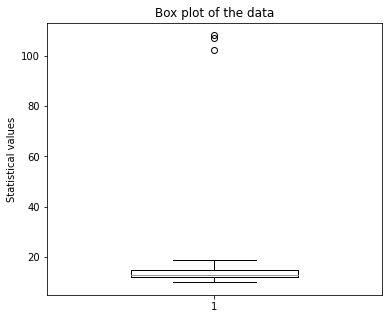

In [67]:
fig = plt.figure(figsize=(6,5))
plt.boxplot(dataset, widths=0.5)
plt.ylabel('Statistical values')
plt.title('Box plot of the data')
plt.show()

For above box plot, there are three dots around values little bit more than 100 at the top of the box. These dots are exactly the outliers we calculated before.